In [1]:
import os
import itertools
import random
import functools

import numpy as np
import matplotlib.pyplot as plt

import data
import models

from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Force data and model generation despite saved file is present on disk.
force = False

# Files specification.
model_file_name = 'model.h5'

train_set_files = ('X.npy', 'y.npy')
val_set_files = ('X_val.npy', 'y_val.npy')
test_set_files = ('X_test.npy', 'y_test.npy')

# Dataset parameters.
num_samples = 1024
num_samples_val = 256
num_samples_test = 256

input_dimensions = (128, 128)
flatten_dataset = False
augment_with_mesh = False

# Model parameters

# Use partially applied function in case if model generation function has to be parametrized.
model_generator = functools.partial(models.cnn_model,
                                    (input_dimensions[0], input_dimensions[1], 3 if augment_with_mesh else 1),
                                    [4, 8, 16, 32, 64, 128, 192], 3)

# Model training parameters.
batch_size = 64
epochs = 200

# Generate/load data

In [3]:
X, y = None, None
X_val, y_val = None, None
X_test, y_test = None, None

dataset_exists = all(os.path.exists(path) for path in itertools.chain(train_set_files, val_set_files, test_set_files))

if not dataset_exists or force:
    X, y = data.generate_data(input_dimensions, num_samples)
    X_val, y_val = data.generate_data(input_dimensions, num_samples_val)
    X_test, y_test = data.generate_data(input_dimensions, num_samples_test)

    if flatten_dataset:
        X, X_val, X_test = (data.flatten(XX) for XX in [X, X_val, X_test])
        
    if augment_with_mesh:
        X, X_val, X_test = (data.augment_with_mesh(XX) for XX in [X, X_val, X_test])

    data.dump_dataset((X, y), train_set_files)
    data.dump_dataset((X_val, y_val), val_set_files)
    data.dump_dataset((X_test, y_test), test_set_files)
    
    print('Datasets have been generated and dumped')
else:
    X, y = data.load_dataset(train_set_files)
    X_val, y_val = data.load_dataset(val_set_files)
    X_test, y_test = data.load_dataset(test_set_files)

    print('Datasets have been loaded')

Datasets have been loaded


## Visualize random samples from training set

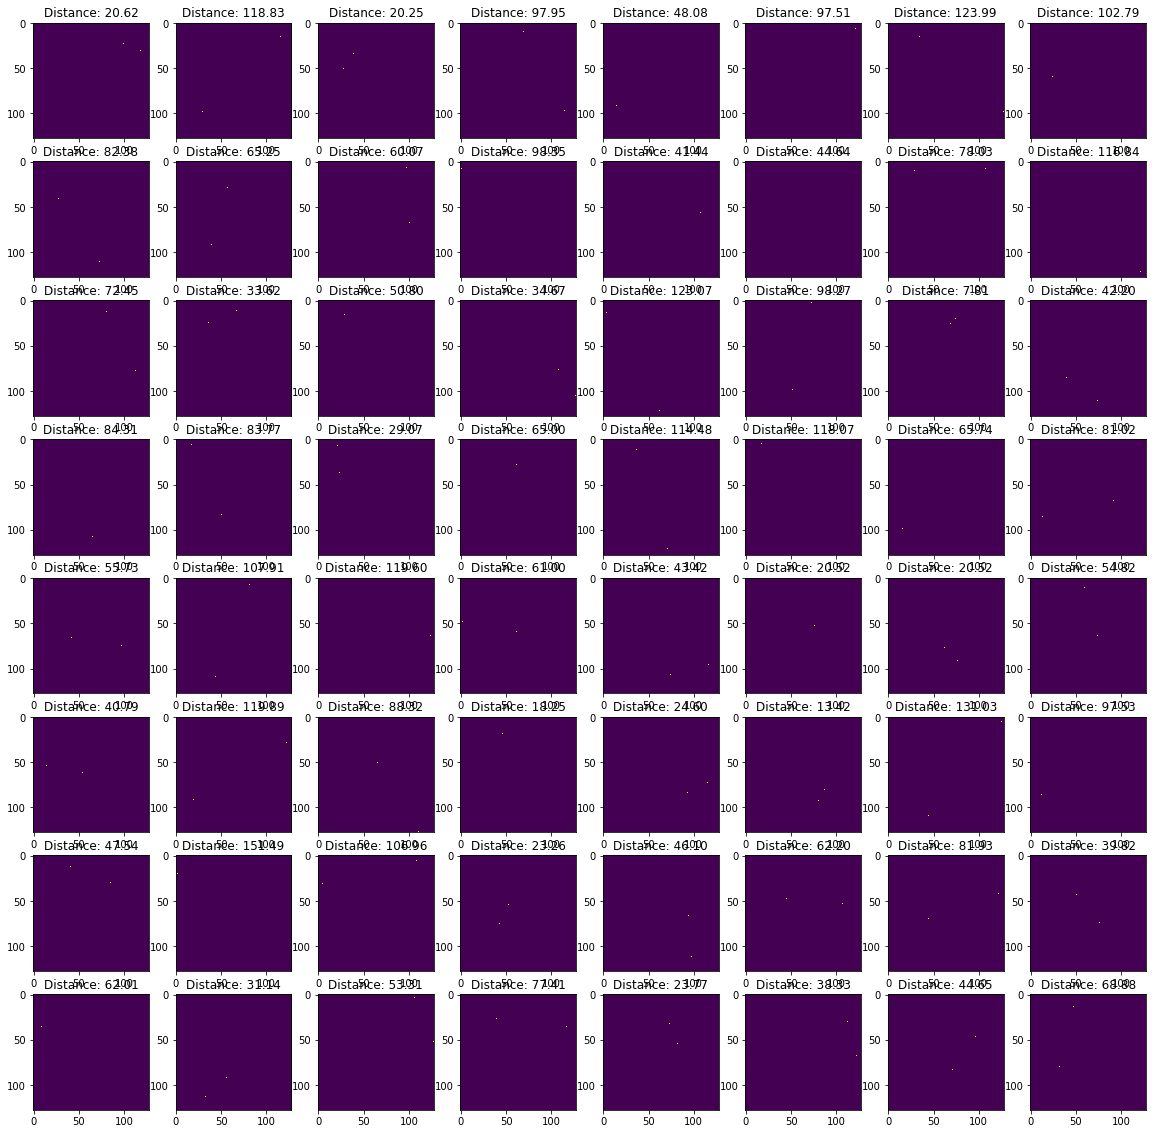

In [4]:
exhibit_samples = random.sample(range(len(y)), 64)

plt.figure(figsize=(20, 20))

for idx, sample_idx in enumerate(exhibit_samples, start=1):
    plt.subplot(8, 8, idx)
    plt.title('Distance: {0:.2f}'.format(y[sample_idx]))
    plt.imshow(X[sample_idx].reshape((X.shape[1], X.shape[2])))

# Generate/load model

Generating and fitting the model
Train on 1024 samples, validate on 256 samples
Epoch 1/200
1024/1024 [==============================] - 15s - loss: 1635.2968 - val_loss: 4248.0765
Epoch 2/200
1024/1024 [==============================] - 12s - loss: 437.4898 - val_loss: 2713.3182
Epoch 3/200
1024/1024 [==============================] - 12s - loss: 239.2162 - val_loss: 1783.0099
Epoch 4/200
1024/1024 [==============================] - 12s - loss: 209.7167 - val_loss: 1880.1202
Epoch 5/200
1024/1024 [==============================] - 12s - loss: 137.6896 - val_loss: 1630.0115
Epoch 6/200
1024/1024 [==============================] - 12s - loss: 164.6298 - val_loss: 3951.3685
Epoch 7/200
1024/1024 [==============================] - 12s - loss: 182.2951 - val_loss: 4332.3096
Epoch 8/200
1024/1024 [==============================] - 12s - loss: 143.6617 - val_loss: 3661.6232
Epoch 9/200
1024/1024 [==============================] - 12s - loss: 145.2118 - val_loss: 4156.0509
Epoch 10/200
1024/1

1024/1024 [==============================] - 12s - loss: 37.1118 - val_loss: 88.8698
Epoch 83/200
1024/1024 [==============================] - 12s - loss: 45.2570 - val_loss: 31.7757
Epoch 84/200
1024/1024 [==============================] - 12s - loss: 50.1690 - val_loss: 84.1387
Epoch 85/200
1024/1024 [==============================] - 12s - loss: 39.1743 - val_loss: 115.3006
Epoch 86/200
1024/1024 [==============================] - 12s - loss: 45.1996 - val_loss: 74.6202
Epoch 87/200
1024/1024 [==============================] - 12s - loss: 35.8940 - val_loss: 126.0810
Epoch 88/200
1024/1024 [==============================] - 12s - loss: 30.9056 - val_loss: 39.0893
Epoch 89/200
1024/1024 [==============================] - 12s - loss: 40.0847 - val_loss: 103.1984
Epoch 90/200
1024/1024 [==============================] - 12s - loss: 38.7502 - val_loss: 161.5954
Epoch 91/200
1024/1024 [==============================] - 12s - loss: 46.3597 - val_loss: 46.9874
Epoch 92/200
1024/1024 [=====

1024/1024 [==============================] - 12s - loss: 30.8164 - val_loss: 60.2898
Epoch 165/200
1024/1024 [==============================] - 12s - loss: 32.6972 - val_loss: 23.5286
Epoch 166/200
1024/1024 [==============================] - 12s - loss: 28.1332 - val_loss: 258.0804
Epoch 167/200
1024/1024 [==============================] - 12s - loss: 34.8507 - val_loss: 62.9673
Epoch 168/200
1024/1024 [==============================] - 12s - loss: 33.0388 - val_loss: 36.2994
Epoch 169/200
1024/1024 [==============================] - 12s - loss: 24.3320 - val_loss: 44.6261
Epoch 170/200
1024/1024 [==============================] - 12s - loss: 34.2186 - val_loss: 43.0475
Epoch 171/200
1024/1024 [==============================] - 12s - loss: 25.8401 - val_loss: 143.4581
Epoch 172/200
1024/1024 [==============================] - 12s - loss: 28.8480 - val_loss: 44.9245
Epoch 173/200
1024/1024 [==============================] - 12s - loss: 28.3892 - val_loss: 31.3997
Epoch 174/200
1024/102

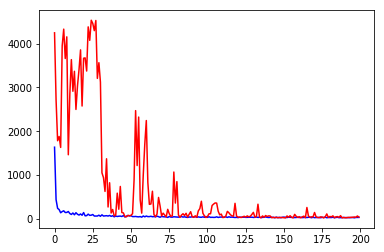

In [15]:
model = None

if not os.path.exists(model_file_name) or force:
    print('Generating and fitting the model')

    model = model_generator()
    callbacks = [ReduceLROnPlateau(patience=10, verbose=1, min_lr=1e-8), EarlyStopping(patience=20, verbose=1)]
    
    history = model.fit(X, y, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)
    model.save(model_file_name)
    
    plt.plot(history.epoch, history.history['loss'], 'b-', history.epoch, history.history['val_loss'], 'r-')
    
    print('Done!')
else:
    model = load_model(model_file_name)
    print('Model has been loaded')

# Analyze results

In [17]:
pred = model.predict(X_test).ravel()

(array([ 84.,  67.,  42.,  26.,  13.,  16.,   1.,   4.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  5.12825035e-03,   1.74799532e+00,   3.49086240e+00,
          5.23372947e+00,   6.97659655e+00,   8.71946362e+00,
          1.04623307e+01,   1.22051978e+01,   1.39480648e+01,
          1.56909319e+01,   1.74337990e+01,   1.91766661e+01,
          2.09195331e+01,   2.26624002e+01,   2.44052673e+01,
          2.61481344e+01,   2.78910014e+01,   2.96338685e+01,
          3.13767356e+01,   3.31196027e+01,   3.48624697e+01,
          3.66053368e+01,   3.83482039e+01,   4.00910710e+01,
          4.18339380e+01,   4.35768051e+01]),
 <a list of 25 Patch objects>)

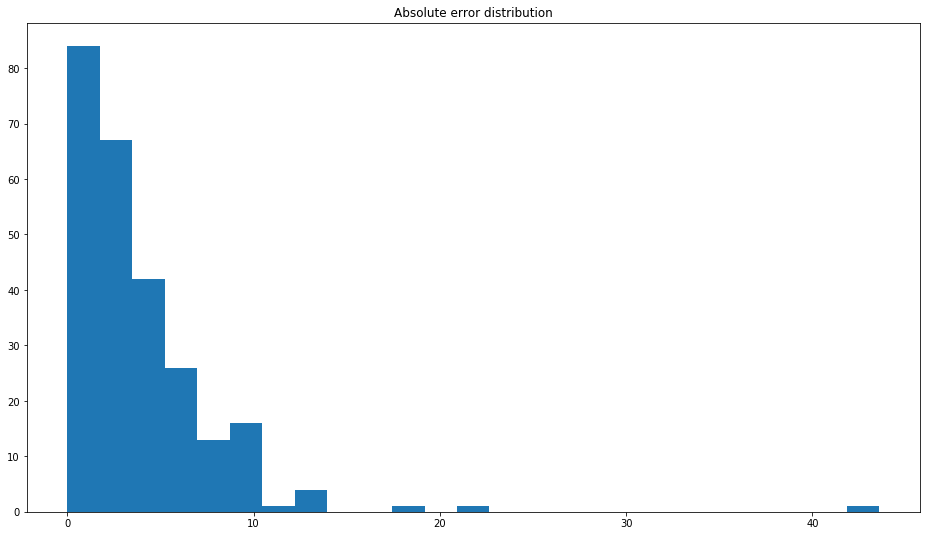

In [20]:
plt.figure(figsize=(16, 9))

plt.title('Absolute error distribution')
plt.hist(np.abs(y_test - pred), bins=25)

In [23]:
print('Test set loss: {}'.format(model.evaluate(X_test, y_test)))

256/256 [==============================] - 0s     
Test set loss: 41.047688484191895
